In [ ]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" studies
#2239 documents considered relevant after TM (references already removed)
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [1]:
import functions

In [2]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Abstracts"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.csv"

In [3]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [4]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [5]:
print("We have a total of {} documents".format(len(doc_list)))

We have a total of 15068 documents


In [6]:
dictionary = functions.os_level.makedict(dict_path)

In [7]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [8]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [9]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [10]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 596), ('cerebellum', 193), ('cingulate cortex', 182), ('hippocampus', 182), ('amygdala', 114), ('cuneus', 97), ('precuneus', 90), ('anterior cingulate cortex', 88), ('insular cortex', 87), ('ventral tegmental area', 69), ('caudate nucleus', 66), ('posterior cingulate gyrus', 57), ('cerebellar crus', 52), ('dorsolateral prefrontal cortex', 50), ('orbitofrontal area', 45), ('substantia nigra', 36), ('lenticular nucleus', 35), ('premotor cortex', 32), ('orbital inferior frontal gyrus', 31), ('intralaminar thalamus', 25), ('primary motor cortex', 25), ('auditory cortex', 24), ('precentral gyrus', 24), ('supplementary motor cortex', 23), ('rolandic operculum', 21), ('fusiform gyrus', 20), ('locus coeruleus', 17), ('vermis', 17), ('superior temporal gyrus', 17), ('primary visual cortex', 16), ('superior frontal gyrus', 16), ('lenticular nucleus pallidum', 15), ('lenticular nucleus putamen', 14), ('supramarginal gyrus', 14), ('inferior parietal gyrus', 13), ('angular gy

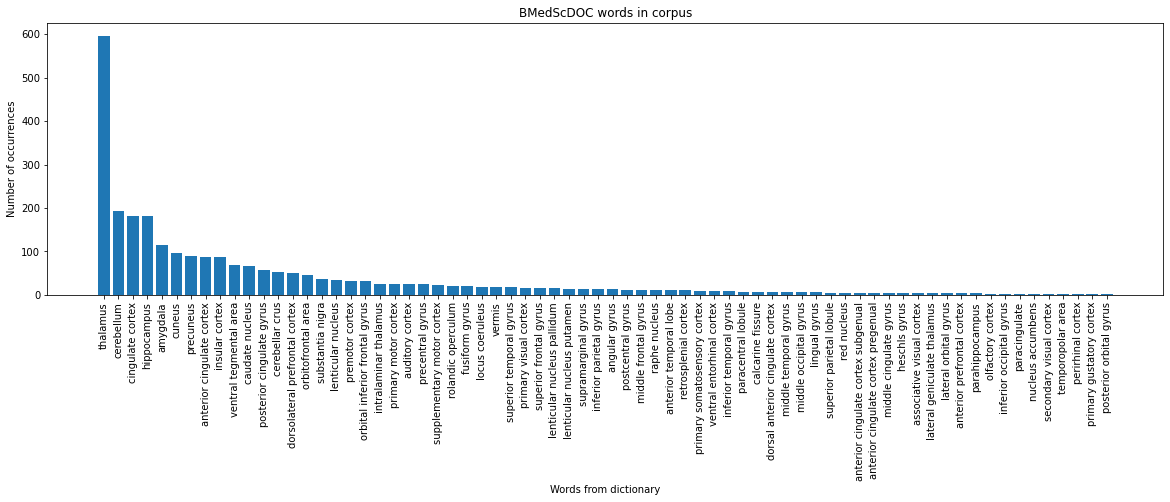

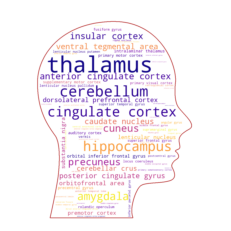

In [11]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [12]:
total = [('thalamus', 596), ('cerebellum', 193), ('cingulate cortex', 182), ('hippocampus', 182), ('amygdala', 114), ('cuneus', 97), ('precuneus', 90), ('anterior cingulate cortex', 88), ('insular cortex', 87), ('ventral tegmental area', 69), ('caudate nucleus', 66), ('posterior cingulate gyrus', 57), ('cerebellar crus', 52), ('dorsolateral prefrontal cortex', 50), ('orbitofrontal area', 45), ('substantia nigra', 36), ('lenticular nucleus', 35), ('premotor cortex', 32), ('orbital inferior frontal gyrus', 31), ('intralaminar thalamus', 25), ('primary motor cortex', 25), ('auditory cortex', 24), ('precentral gyrus', 24), ('supplementary motor cortex', 23), ('rolandic operculum', 21), ('fusiform gyrus', 20), ('locus coeruleus', 17), ('vermis', 17), ('superior temporal gyrus', 17), ('primary visual cortex', 16), ('superior frontal gyrus', 16), ('lenticular nucleus pallidum', 15), ('lenticular nucleus putamen', 14), ('supramarginal gyrus', 14), ('inferior parietal gyrus', 13), ('angular gyrus', 13), ('postcentral gyrus', 12), ('middle frontal gyrus', 11), ('raphe nucleus', 11), ('anterior temporal lobe', 10), ('retrosplenial cortex', 10), ('primary somatosensory cortex', 9), ('ventral entorhinal cortex', 9), ('inferior temporal gyrus', 8), ('paracentral lobule', 6), ('calcarine fissure', 6), ('dorsal anterior cingulate cortex', 6), ('middle temporal gyrus', 6), ('middle occipital gyrus', 6), ('lingual gyrus', 6), ('superior parietal lobule', 5), ('red nucleus', 5), ('anterior cingulate cortex subgenual', 5), ('anterior cingulate cortex pregenual', 5), ('middle cingulate gyrus', 5), ('heschls gyrus', 5), ('associative visual cortex', 3), ('lateral geniculate thalamus', 3), ('lateral orbital gyrus', 3), ('anterior prefrontal cortex', 3), ('parahippocampus', 3), ('olfactory cortex', 2), ('inferior occipital gyrus', 2), ('paracingulate', 2), ('nucleus accumbens', 2), ('secondary visual cortex', 2), ('temporopolar area', 1), ('perirhinal cortex', 1), ('primary gustatory cortex', 1), ('posterior orbital gyrus', 1)]
len(total)

70

In [13]:
total

[('thalamus', 596),
 ('cerebellum', 193),
 ('cingulate cortex', 182),
 ('hippocampus', 182),
 ('amygdala', 114),
 ('cuneus', 97),
 ('precuneus', 90),
 ('anterior cingulate cortex', 88),
 ('insular cortex', 87),
 ('ventral tegmental area', 69),
 ('caudate nucleus', 66),
 ('posterior cingulate gyrus', 57),
 ('cerebellar crus', 52),
 ('dorsolateral prefrontal cortex', 50),
 ('orbitofrontal area', 45),
 ('substantia nigra', 36),
 ('lenticular nucleus', 35),
 ('premotor cortex', 32),
 ('orbital inferior frontal gyrus', 31),
 ('intralaminar thalamus', 25),
 ('primary motor cortex', 25),
 ('auditory cortex', 24),
 ('precentral gyrus', 24),
 ('supplementary motor cortex', 23),
 ('rolandic operculum', 21),
 ('fusiform gyrus', 20),
 ('locus coeruleus', 17),
 ('vermis', 17),
 ('superior temporal gyrus', 17),
 ('primary visual cortex', 16),
 ('superior frontal gyrus', 16),
 ('lenticular nucleus pallidum', 15),
 ('lenticular nucleus putamen', 14),
 ('supramarginal gyrus', 14),
 ('inferior parietal 